In [359]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [360]:
# Number of vertices in the bipartition
n1 = 6
n2 = 7

p1 = 0.4 # probability of an edge between two vertices belonging to the same partition
p2 = 0.6 # probability of an edge between two vertices belonging to different partitions

# Set the seed for reproducibility
np.random.seed(0)

In [361]:
# Generate a sparse square matrix of size n1 x n1
matrix1 = np.random.choice([0, 1], size=(n1, n1), p=[1-p1, p1])
# Symmetrize the matrix
matrix1 = np.triu(matrix1, 1) + np.triu(matrix1, 1).T

# Generate a sparse square matrix of size n2 x n2
matrix2 = np.random.choice([0, 1], size=(n2, n2), p=[1-p1, p1])
# Symmetrize the matrix
matrix2 = np.triu(matrix2, 1) + np.triu(matrix2, 1).T

# Generate a dense matrix of size n1 x n2
matrix3 = np.random.choice([0, 1], size=(n1, n2), p=[1-p2, p2])

# Concatenate the matrices
A = np.block([[matrix1, matrix3], [matrix3.T, matrix2]])

print(A)

[[0 1 1 0 0 1 0 1 0 1 1 0 1]
 [1 0 1 0 1 0 0 1 0 0 1 0 1]
 [1 1 0 0 0 1 0 1 0 1 1 0 1]
 [0 0 0 0 0 1 1 1 0 1 1 1 1]
 [0 1 0 0 0 0 0 1 0 1 1 1 1]
 [1 0 1 1 0 0 1 1 1 1 1 1 0]
 [0 0 0 1 0 1 0 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 1]
 [1 0 1 1 1 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 1]
 [0 0 0 1 1 1 0 0 0 1 0 0 0]
 [1 1 1 1 1 0 1 0 1 0 1 0 0]]


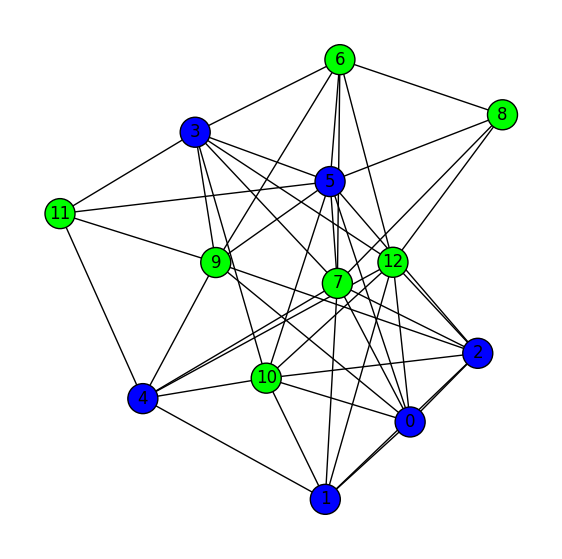

In [362]:
# Generate an undirected graph with the adjacency matrix A
g = ig.Graph(n=n1 + n2, edges=[(i, j) for i, j in zip(*np.where(A)) if i < j])

fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    g,
    target=ax,
    vertex_size=30,
    vertex_label=range(g.vcount()),
    vertex_color=["blue" if i < n1 else "green" for i in range(g.vcount())],
    edge_width=[1],
    edge_color=["black"]
)

In [372]:
adj_matrix = g.get_adjacency()
eigenvalues = np.linalg.eigh(adj_matrix)[0]
eigenvectors = np.linalg.eigh(adj_matrix)[1]

print("Eigenvalues:", np.round(eigenvalues, 1))

smallest_eigenvector = eigenvectors[:, 0]

# indices of positive values in the smallest eigenvector
positive_indices = np.where(smallest_eigenvector > 0)[0]

# indices of negative values in the smallest eigenvector
negative_indices = np.where(smallest_eigenvector < 0)[0]

print("Positive indices:", positive_indices)
print("Negative indices:", negative_indices)

Eigenvalues: [-3.8 -2.5 -1.9 -1.5 -1.  -1.  -0.4 -0.1  0.4  1.   1.6  2.4  6.9]
Positive indices: [ 5  7  9 10 11 12]
Negative indices: [0 1 2 3 4 6 8]


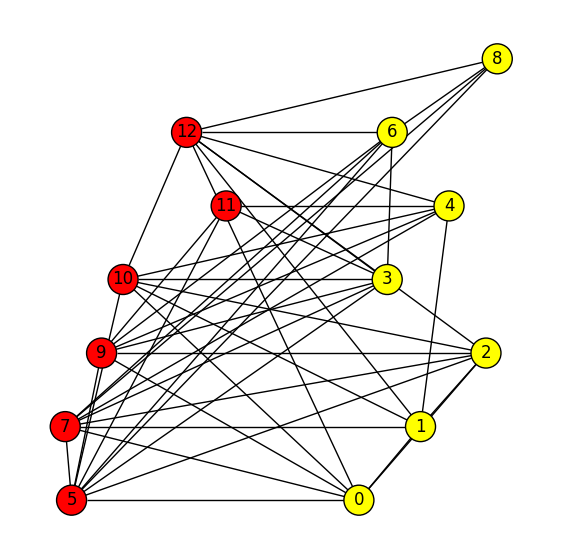

In [373]:
g_layout = [(0 + np.random.uniform(-0.3, 0.3), np.where(positive_indices == i)[0][0]) 
            if i in positive_indices 
            else (1 + np.random.uniform(-0.3, 0.3), np.where(negative_indices == i)[0][0]) 
            for i in range(g.vcount())]

fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    g,
    target=ax,
    layout=g_layout,
    vertex_size=30,
    vertex_label=range(g.vcount()),
    vertex_color=["red" if i in positive_indices else "yellow" for i in range(g.vcount())],
    edge_width=[1],
    edge_color=["black"]
)

In [374]:
# Count the number of internal edges in the positive partition
num_internal_edges_positive = 0
for i in positive_indices:
    for j in positive_indices:
        if adj_matrix[i, j] == 1:
            num_internal_edges_positive += 1
num_internal_edges_positive /= 2

# Count the number of internal edges in the negative partition
num_internal_edges_negative = 0
for i in negative_indices:
    for j in negative_indices:
        if adj_matrix[i, j] == 1:
            num_internal_edges_negative += 1
num_internal_edges_negative /= 2

# Count the number of external edges between the positive and negative partitions
num_external_edges = 0
for i in positive_indices:
    for j in negative_indices:
        if adj_matrix[i, j] == 1:
            num_external_edges += 1

print(f"Number of internal edges in the positive partition: {int(num_internal_edges_positive)}")
print(f"Number of internal edges in the negative partition: {int(num_internal_edges_negative)}")
print(f"Number of external edges between the positive and negative partitions: {int(num_external_edges)}")

Number of internal edges in the positive partition: 6
Number of internal edges in the negative partition: 6
Number of external edges between the positive and negative partitions: 31
